# Import thư viện

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import time
import pandas as pd

## Import class SVM

In [3]:
from svm import *
from hog_class import *
from functions import *

In [4]:
n_test = [200, 400, 600]
link_cat = './drive/MyDrive/LTSS/data2/Cat/**'
link_dog = './drive/MyDrive/LTSS/data2/Dog/**'

# So sánh khi không có HOG

In [5]:
acc1_no_hog = []
acc2_no_hog = []
acc3_no_hog = []
acc4_no_hog = []
acc5_no_hog = []
acc6_no_hog = []
time1_no_hog = []
time2_no_hog = []
time3_no_hog = []
time4_no_hog = []
time5_no_hog = []
time6_no_hog = []

In [6]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    x_train = np.array([x.flatten() for x in X_train])
    x_test = np.array([x.flatten() for x in X_test])
    
    y_train_sklearn = np.array([str(y) for y in y_train])
    y_test_sklearn = np.array([str(y) for y in y_test])
    
    start = time.time()
    svm = SVM_New(kernel = 'linear')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time1_no_hog.append(end-start)
    acc1_no_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_New(kernel = 'rbf')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time2_no_hog.append(end-start)
    acc2_no_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVM_Pa(kernel = 'linear')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time3_no_hog.append(end-start)
    acc3_no_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_Pa(kernel = 'rbf')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time4_no_hog.append(end-start)
    acc4_no_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVC(kernel = 'linear', shrinking = True)
    svm.fit(x_train, y_train_sklearn)
    pred = svm.predict(x_test)
    end = time.time()
    time5_no_hog.append(end-start)
    acc5_no_hog.append(accuracy_score(pred, y_test_sklearn))
    
    start = time.time()
    svm = SVC(kernel = 'rbf', shrinking = True)
    svm.fit(x_train, y_train_sklearn)
    pred = svm.predict(x_test)
    end = time.time()
    time6_no_hog.append(end-start)
    acc6_no_hog.append(accuracy_score(pred, y_test_sklearn))

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 25 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 5 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 25 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due t

# So sánh khi có HOG

In [7]:
blocksize = (2, 2)
cellsize = (8, 8)
nbin = 9
sbin = 40
threadperblock = (32, 32)
hog = HOG_CUDA_2(blocksize, cellsize, nbin, sbin, threadperblock)


acc1_hog = []
acc2_hog = []
acc3_hog = []
acc4_hog = []
acc5_hog = []
acc6_hog = []
time1_hog = []
time2_hog = []
time3_hog = []
time4_hog = []
time5_hog = []
time6_hog = []

In [8]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    x_train = np.array([x.flatten() for x in X_train])
    x_test = np.array([x.flatten() for x in X_test])
    
    y_train_sklearn = np.array([str(y) for y in y_train])
    y_test_sklearn = np.array([str(y) for y in y_test])
    
    start = time.time()
    svm = SVM_New(kernel = 'linear')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time1_hog.append(end-start)
    acc1_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_New(kernel = 'rbf')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time2_hog.append(end-start)
    acc2_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVM_Pa(kernel = 'linear')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time3_hog.append(end-start)
    acc3_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_Pa(kernel = 'rbf')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time4_hog.append(end-start)
    acc4_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVC(kernel = 'linear', shrinking = True)
    big_fit(X_train, y_train_sklearn, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time5_hog.append(end-start)
    acc5_hog.append(accuracy_score(pred, y_test_sklearn))
    
    start = time.time()
    svm = SVC(kernel = 'rbf', shrinking = True)
    big_fit(X_train, y_train_sklearn, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time6_hog.append(end-start)
    acc6_hog.append(accuracy_score(pred, y_test_sklearn))

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


# Plot thời gian chạy

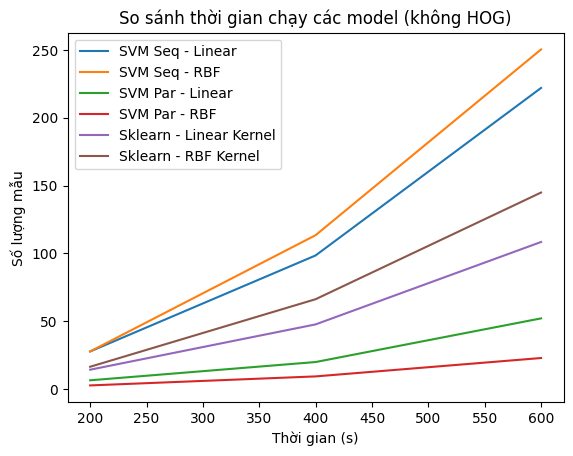

In [9]:
plt.plot(n_test, time1_no_hog, label = 'SVM Seq - Linear')
plt.plot(n_test, time2_no_hog, label = 'SVM Seq - RBF')
plt.plot(n_test, time3_no_hog, label = 'SVM Par - Linear')
plt.plot(n_test, time4_no_hog, label = 'SVM Par - RBF')
plt.plot(n_test, time5_no_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, time6_no_hog, label = 'Sklearn - RBF Kernel')

plt.ylabel("Số lượng mẫu")
plt.xlabel("Thời gian (s)")
plt.title("So sánh thời gian chạy các model (không HOG)")
plt.legend()
plt.show()

### Nhận xét:
- Ta thấy thời gian chạy của SVM phiên bản song song là thấp nhất ở cả 2 kernel.
- SVM bản cũ có thời gian chạy chậm nhất.
- SVM bản song song có thời gian chạy nhanh > 2 lần so với thư viện khi dùng shrinking

* Shrinking là 1 cơ chế trong SMO dùng để tăng tốc độ xử lý khi số lượng dữ liệu lớn. Thay vì phải thao tác trên toàn bộ tập dữ liệu, với shrinking, SMO chỉ hoạt động trên tập các điểm dữ liệu được chọn, và điều này ẩn chứa nguy cơ bị thiếu sót thông tin dữ liệu.

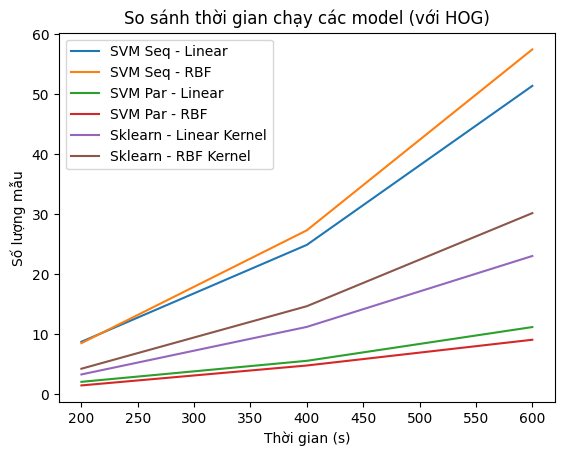

In [10]:
plt.plot(n_test, time1_hog, label = 'SVM Seq - Linear')
plt.plot(n_test, time2_hog, label = 'SVM Seq - RBF')
plt.plot(n_test, time3_hog, label = 'SVM Par - Linear')
plt.plot(n_test, time4_hog, label = 'SVM Par - RBF')
plt.plot(n_test, time5_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, time6_hog, label = 'Sklearn - RBF Kernel')

plt.ylabel("Số lượng mẫu")
plt.xlabel("Thời gian (s)")
plt.title("So sánh thời gian chạy các model (với HOG)")
plt.legend()
plt.show()

### Nhận xét về kết quả chạy:
Ngay cả khi kết hợp với HOG, SVM song song vẫn đạt tốc độ nhanh hơn rất nhiều so với thư viện và bản tuần tự.

# Thông số chi tiết kết quả

In [11]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear Acc": acc1_no_hog, \
    "SVM Seq RBF Acc": acc2_no_hog, "SVM Par Linear Acc": acc3_no_hog, \
        "SVM Par RBF Acc": acc4_no_hog, "Sklearn Linear+Shrink Acc": acc5_no_hog, \
            "Sklearn RBF+Shrink Acc": acc6_no_hog})
df

,Số lượng mẫu,SVM Seq Linear Acc,SVM Seq RBF Acc,SVM Par Linear Acc,SVM Par RBF Acc,Sklearn Linear+Shrink Acc,Sklearn RBF+Shrink Acc
0,200,0.616667,0.616667,0.616667,0.616667,0.616667,0.616667
1,400,0.608333,0.608333,0.608333,0.608333,0.608333,0.608333
2,600,0.577778,0.655556,0.577778,0.655556,0.577778,0.655556


In [12]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear time(s)": time1_no_hog, \
    "SVM Seq RBF time(s)": time2_no_hog, "SVM Par Linear time(s)": time3_no_hog, \
        "SVM Par RBF time(s)": time4_no_hog, "Sklearn Linear+Shrink time(s)": time5_no_hog, \
            "Sklearn RBF+Shrink time(s)": time6_no_hog})
df

,Số lượng mẫu,SVM Seq Linear time(s),SVM Seq RBF time(s),SVM Par Linear time(s),SVM Par RBF time(s),Sklearn Linear+Shrink time(s),Sklearn RBF+Shrink time(s)
0,200,27.701313,27.741849,6.442970,2.668970,14.256228,16.426827
1,400,98.457803,113.383422,19.906824,9.316480,47.644573,66.206712
2,600,221.895194,250.284961,52.071913,22.865625,108.372788,144.820348


In [13]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear + hog Acc": acc1_hog, \
    "SVM Seq RBF + hog Acc": acc2_hog, "SVM Par Linear + hog Acc": acc3_hog, \
        "SVM Par RBF + hog Acc": acc4_hog, "Sklearn Linear+Shrink + hog Acc": acc5_hog, \
            "Sklearn RBF+Shrink + hog Acc": acc6_hog})
df

,Số lượng mẫu,SVM Seq Linear + hog Acc,SVM Seq RBF + hog Acc,SVM Par Linear + hog Acc,SVM Par RBF + hog Acc,Sklearn Linear+Shrink + hog Acc,Sklearn RBF+Shrink + hog Acc
0,200,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333
1,400,0.633333,0.658333,0.633333,0.658333,0.633333,0.658333
2,600,0.672222,0.672222,0.672222,0.672222,0.672222,0.672222


In [14]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear + hog time(s)": time1_hog, \
    "SVM Seq RBF + hog time(s)": time2_hog, "SVM Par Linear + hog time(s)": time3_hog, \
        "SVM Par RBF + hog time(s)": time4_hog, "Sklearn Linear+Shrink + hog time(s)": time5_hog, \
            "Sklearn RBF+Shrink + hog time(s)": time6_hog})
df

,Số lượng mẫu,SVM Seq Linear + hog time(s),SVM Seq RBF + hog time(s),SVM Par Linear + hog time(s),SVM Par RBF + hog time(s),Sklearn Linear+Shrink + hog time(s),Sklearn RBF+Shrink + hog time(s)
0,200,8.774768,8.547623,2.101062,1.502194,3.332967,4.285140
1,400,24.927843,27.358739,5.604059,4.823539,11.258466,14.706913
2,600,51.427526,57.503534,11.228754,9.114409,23.074051,30.218442


### Nhận xét về độ chính xác:
SVM song song cho độ chính xác tuyệt đối với cả thư viện và phiên bản tuần tự.